# Applied Machine Learning: Module 2 (Supervised Learning, Part I)
## Preamble and Review



In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# no idea
np.set_printoptions(precision=2)

# we read the fruits data again
fruits = pd.read_table('readonly/fruit_data_with_colors.txt')

# features of the fruits DF
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

#X is the set of features and Y the answers (in the form of labels 1,2,3,4)
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']

#names of the fruits
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']


# Now we consider only these two features
X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']



#take some data for train and some for test.
X_train, X_test, y_train, y_test = train_test_split(X_fruits, 
                                y_fruits, random_state=0)


from sklearn.preprocessing import MinMaxScaler


# no idea what this is
# a function that scales the data features data into the range 0,1
scaler = MinMaxScaler()

# this is the scaled train data
X_train_scaled = scaler.fit_transform(X_train)
print('X_train_scaled data', X_train_scaled)


# we must apply the scaling to the test set that we 
# computed for the training set
X_test_scaled = scaler.transform(X_test)


#create the knn object
knn = KNeighborsClassifier(n_neighbors = 5)
# and fit it to the train data
knn.fit(X_train_scaled, y_train)

#check the accuracy of the trained knn in the train data and in the test
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))



#test the knn on a random fruit
#scale it before
example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

X_train_scaled data [[0.49 0.41 0.28 0.73]
 [0.94 0.44 0.35 0.46]
 [0.   0.   0.   0.7 ]
 [0.51 0.53 0.27 0.38]
 [0.46 0.41 0.31 0.68]
 [0.72 0.   0.2  0.49]
 [0.52 0.35 0.3  0.7 ]
 [0.51 0.44 0.28 0.65]
 [0.63 0.03 0.14 0.49]
 [0.48 0.5  0.31 0.76]
 [0.57 0.15 0.14 0.46]
 [0.8  0.5  0.46 0.59]
 [0.48 0.56 0.29 0.38]
 [0.05 0.   0.01 0.59]
 [0.62 0.59 0.48 0.73]
 [0.54 0.53 0.29 0.32]
 [0.65 0.06 0.19 0.43]
 [0.54 0.5  0.3  0.84]
 [0.54 0.06 0.14 0.46]
 [0.58 0.38 0.36 1.  ]
 [0.57 0.44 0.31 0.41]
 [0.8  1.   1.   0.54]
 [0.55 0.5  0.33 0.49]
 [0.63 0.09 0.15 0.41]
 [0.69 0.21 0.27 0.46]
 [0.62 0.03 0.15 0.46]
 [0.58 0.41 0.29 0.59]
 [0.43 0.65 0.37 0.11]
 [0.48 0.35 0.28 0.89]
 [0.8  0.41 0.39 0.46]
 [0.83 0.94 0.95 0.54]
 [0.05 0.03 0.01 0.7 ]
 [0.6  0.53 0.34 0.89]
 [0.55 0.38 0.3  0.57]
 [0.52 0.47 0.29 0.78]
 [0.49 0.47 0.31 0.81]
 [0.46 0.47 0.34 0.92]
 [0.52 0.29 0.24 0.54]
 [0.69 0.09 0.14 0.43]
 [0.11 0.12 0.04 0.68]
 [0.51 0.76 0.41 0.  ]
 [0.68 0.06 0.16 0.51]
 [0.88 0.44 0.

### Functions to make  Datasets

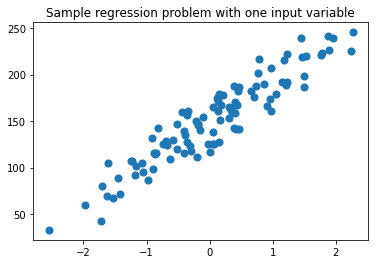

In [2]:
%matplotlib inline

from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

# colormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


# synthetic dataset for simple regression
from sklearn.datasets import make_regression
# function used to generate a dataset for a regression problem

plt.figure()
plt.title('Sample regression problem with one input variable')

#we use the function to create this sample points for a regression problem
# in this case, with 100 sample, 1 feature (1 dimensional)
# n_informative is the number of features used to build the linear model
# bias is the bias term in the underlying linear model
# noise is the sd of the gaussian noise applied to the output
#random state is the seed for random numbers
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 15, random_state=0)
# plot using scatter
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()



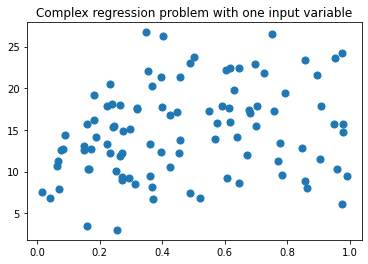

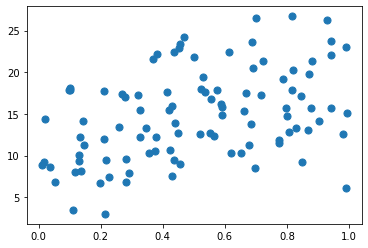

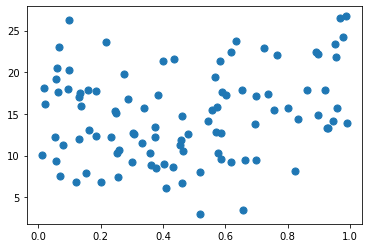

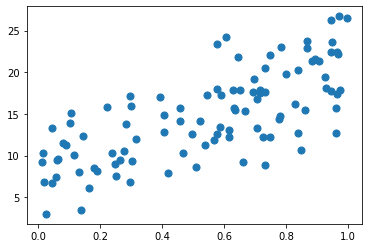

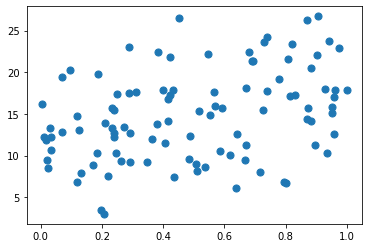

In [3]:
# synthetic dataset for more complex regression
# function to create a more complicated regression problem
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')

# the problem has 5 features, stored in XF_1
# and it has 100 samples

X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 5, random_state=0)

# we are plotting here only the first feature of all samples against the y 
# values.
plt.scatter(X_F1[:, 0], y_F1, marker= 'o', s=50)
plt.show()

# we can also plot the others
plt.scatter(X_F1[:, 1], y_F1, marker= 'o', s=50)
plt.show()

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

plt.scatter(X_F1[:, 3], y_F1, marker= 'o', s=50)
plt.show()

plt.scatter(X_F1[:, 4], y_F1, marker= 'o', s=50)
plt.show()




[[ 0.37 -0.92]
 [-0.16  0.51]
 [-1.64  2.23]
 [ 0.62 -2.19]
 [-0.99  1.93]
 [-0.15  1.31]
 [ 1.62  0.31]
 [-2.01  1.99]
 [ 0.51 -0.13]
 [ 0.41 -0.7 ]
 [ 0.53  1.1 ]
 [ 0.6   1.28]
 [ 0.45  0.85]
 [-1.01  0.77]
 [ 0.48  1.85]
 [ 0.3  -0.79]
 [ 0.33 -0.52]
 [ 0.6  -0.15]
 [ 0.5   1.12]
 [ 0.61  0.43]
 [-1.28  1.03]
 [ 0.31  0.94]
 [ 0.38  1.45]
 [ 0.36 -0.97]
 [ 0.3   0.36]
 [ 0.65 -0.18]
 [-0.15  0.48]
 [ 0.45  1.33]
 [ 0.29  1.48]
 [ 0.44 -0.96]
 [-0.28  0.67]
 [ 0.73  0.95]
 [ 0.44  0.87]
 [ 0.66  0.01]
 [ 0.55 -1.64]
 [-0.98 -0.47]
 [-0.71  0.89]
 [-1.13  1.98]
 [ 0.67  0.22]
 [ 0.35 -1.78]
 [-1.61  0.59]
 [-0.72 -0.09]
 [-0.23 -1.02]
 [ 1.24 -0.28]
 [ 0.26  0.3 ]
 [-1.19  0.84]
 [ 0.84 -1.61]
 [-0.54 -0.12]
 [-2.32  3.19]
 [ 0.6   0.42]
 [ 0.22 -0.19]
 [ 0.61 -0.56]
 [ 0.45  2.72]
 [ 0.8  -1.11]
 [ 0.58 -0.57]
 [ 0.23 -0.47]
 [ 0.6   1.29]
 [ 0.24 -0.68]
 [-1.25  0.99]
 [ 0.38  0.93]
 [-0.85  2.81]
 [ 0.53  1.54]
 [-1.05  1.5 ]
 [-2.21  1.03]
 [ 0.42  0.68]
 [-1.58  1.15]
 [ 0.51 -0

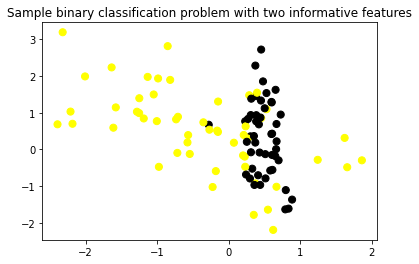

In [4]:
# synthetic dataset for classification (binary) 
plt.figure()

plt.title('Sample binary classification problem with two informative features')

# make classifications makes a data set of n_features features
# and with two possible results, 0 or 1

# we use 100 samples, 2 features (both informative, not redundant)
#each class has only one cluster
#flip_y is the fraction of samples whose cateory is assigned randomly 
#(not according to some rule, just random, in order to confuse)

# class_sep: larger values make the clusters spread out and therefore the 
# problem easier
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

print(X_C2)
print(y_C2)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

[[ -7.35   0.67]
 [  5.47  -5.36]
 [  8.55   2.96]
 [ 12.23   1.46]
 [  5.75  -5.75]
 [  6.66   9.24]
 [ -5.41   1.68]
 [  6.58  -6.47]
 [ 12.67   4.75]
 [ -7.49   0.19]
 [  7.84   1.4 ]
 [ -3.15  -1.89]
 [  9.56 -10.31]
 [  5.21  -7.2 ]
 [ 11.58 -10.14]
 [ 11.54  -0.5 ]
 [  0.86  -6.47]
 [  5.07  -4.88]
 [ -7.09   2.01]
 [ -4.93  -0.62]
 [ -5.83  -3.86]
 [ -5.13   4.03]
 [ -7.34   2.07]
 [  9.28   5.34]
 [  7.34 -10.44]
 [  7.97   4.96]
 [ -4.14  -1.58]
 [ -7.06   3.09]
 [  7.9    2.03]
 [  9.4   -2.12]
 [  9.63 -10.19]
 [  8.49   1.65]
 [ -6.78  -0.16]
 [ -8.52   4.71]
 [  9.06   5.86]
 [  9.2    5.38]
 [ 12.17  -9.32]
 [  8.06   1.02]
 [  7.41  -4.02]
 [ -7.25   2.54]
 [  6.93   8.  ]
 [ -4.41   0.95]
 [  5.17  -6.13]
 [  9.36   9.76]
 [ 11.47  -0.82]
 [  3.22  -7.68]
 [ -4.55  -0.2 ]
 [ -4.06   0.03]
 [  9.55  -0.63]
 [ -3.47  -1.07]
 [  5.48  -5.2 ]
 [  4.34  -6.93]
 [  8.3   -9.51]
 [  4.48  -7.48]
 [  4.71  -7.51]
 [  6.44   9.19]
 [  4.04  -6.63]
 [ 10.77  -9.2 ]
 [ 10.49  -9.0

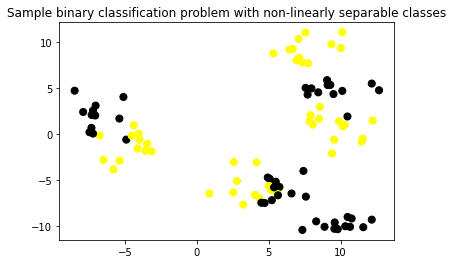

In [5]:

# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable

# 100 samples of 2 features with 8 clusters with 1.3 sd
# it has 8 classifications (that is the reason of 8 clusters)
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)

print(X_D2)
print(y_D2)

# we transform the 8 classifications into two
y_D2 = y_D2 % 2
print(y_D2)


plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')

# we plot the two features and use color code
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [7]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)



### KNN for binary classification

C:\Users\tbasi\OneDrive\Documentos\programación\Data-Science-Python-UofMichigan\course3-ML\adspy_shared_utilities.py:242: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


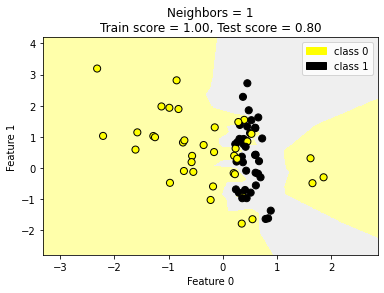

C:\Users\tbasi\OneDrive\Documentos\programación\Data-Science-Python-UofMichigan\course3-ML\adspy_shared_utilities.py:242: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


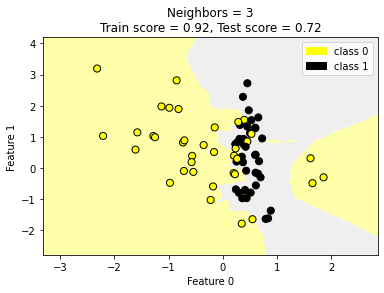

C:\Users\tbasi\OneDrive\Documentos\programación\Data-Science-Python-UofMichigan\course3-ML\adspy_shared_utilities.py:242: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


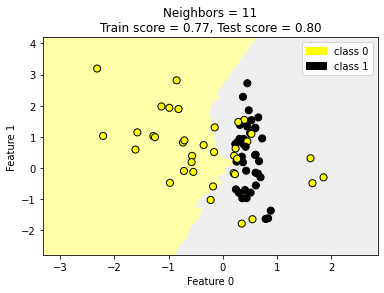

In [10]:
from adspy_shared_utilities import plot_two_class_knn


X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                random_state=0)

# third entry is the number of k in the knn
#the wieghts are uniform

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)
#this prints the scores of train and of score

# Regression

### One feature  Regression KNN neighbors

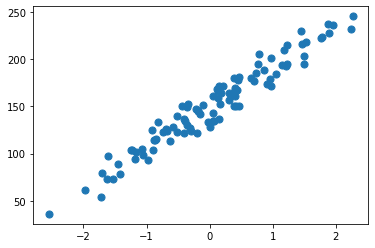

[231.39 139.36 161.49 161.49  78.63 159.64 141.89 220.63 201.43 101.33
 189.47 128.12 215.15 139.36 165.39 112.41 135.88 187.5  158.4  159.64
 231.39 201.43 118.91 118.61 141.89]
R-squared test score: 0.917


In [12]:
from sklearn.neighbors import KNeighborsRegressor
# import a function for KNeighbors Regression

# We make a sample regression with one feature and a little bit  of noise

X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 10, random_state=0)
# plot using scatter
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


# separate the data
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)


# we create a knnreg element, with 5 neighbors and fit it to the train data
# In Kneighborrs_regressor, the target is predicted by local interpolation of the 
# targets associated to the nearest neighbors in training

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

# we predict the X_test data
print(knnreg.predict(X_test))

# calculate the Rsquared score of the X_test  vs the Y_test
# this is the test score
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

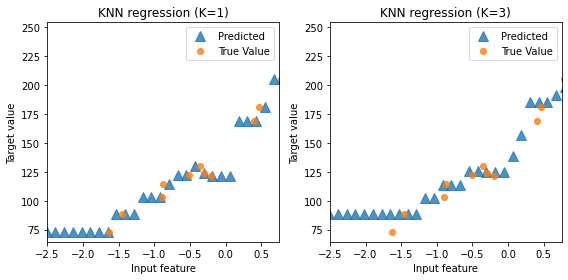

In [13]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))


#we use the same data set as before
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 10, random_state=0)


# We make some info we want to calculate the regression on.
# consisting of many points in the interval
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

# Separate the data
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)


# we will make some graphs for different numbers of k neighbors
for thisaxis, K in zip(subaxes, [1, 3]):
    #create the knnreg object
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    
    #predict the output from the input
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    #graph input and predicted output
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    # plot the train data
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

### Regression model complexity as a function of K

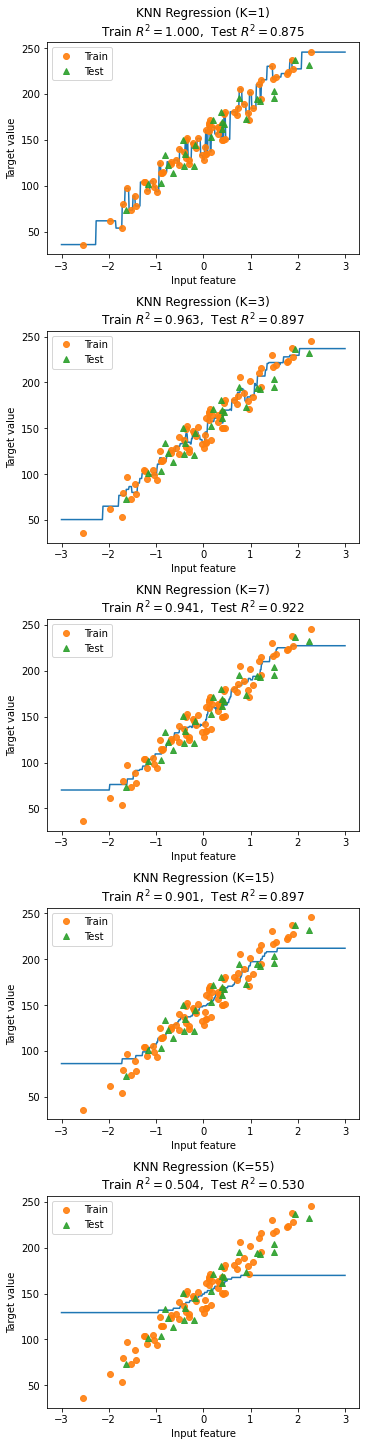

In [14]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)

# Separate the data
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    # prepare the knn
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    
    # predict the output of many points
    y_predict_output = knnreg.predict(X_predict_input)
    
    #score the training and test
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    
    # plot the train and test
    
    # blue line is the predicted values for every point
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


## Linear Model for regression

#### Linear Regression

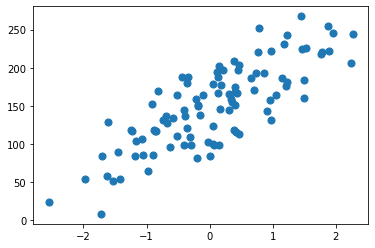

[217.54  63.87  83.82 137.31 188.15 116.34 193.31 116.63 181.29  54.41
 159.38 267.55 117.77  53.42 127.36 131.23 143.89  83.61 168.56 118.16
 231.4  220.19 163.73  99.18 196.36 159.32 150.69 120.61  83.89 187.46
 151.73 167.15 203.09 165.96 112.72 110.9  133.32 102.12   8.01 178.13
  98.45  85.72 163.76 186.67 164.32 136.61 225.78 115.11 155.14 128.52
 254.29 222.41 123.87  98.48 158.16 251.48 145.01 171.07 242.47 118.33
  89.85 224.52  50.76 194.18 244.83 193.64 201.83 221.7  106.02 109.35
 179.35  98.35  24.22 117.24 177.06]
linear model coeff (w): [45.71]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


In [65]:
from sklearn.linear_model import LinearRegression

#take a simple regression with one feature

X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
# plot using scatter
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


# take train and test data
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)


# train the linear regression
# create the linear regression object
linreg = LinearRegression().fit(X_train, y_train)

# this gives us the linreg element
# which has the coefficient and intercept
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))

# we calculate the R^2 value for training and test data
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

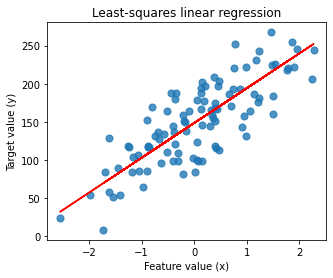

In [16]:
# Example Plot

plt.figure(figsize=(5,4))
# plot the scatter data
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
#plot the best fit line
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

## Linear Regression multiple features

In [19]:
# take the crime data set

X_crime = pd.read_csv('xcrime.csv')
y_crime = pd.read_csv('ycrime.csv')

X_crime.head()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,...,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,...,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,...,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,...,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24
4,140494,2.45,18.09,32.89,20.04,13.26,140494,100.0,21577,75.78,...,26.4,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66


In [22]:
y_crime.head()

,value
0,41.02
1,127.56
2,218.59
3,306.64
4,442.95


In [23]:
# We will now need multiple coefficients

# take the test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

# create a linear regression object
linreg = LinearRegression().fit(X_train, y_train)


# we print the intercept
print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
#and print the coefficient
print('linear model coeff:\n{}'
     .format(linreg.coef_))
# print the score
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: [-1728.13]
linear model coeff:
[[ 1.62e-03 -9.43e+01  1.36e+01 -3.13e+01 -8.15e-02 -1.69e+01 -2.43e-03
   1.53e+00 -1.39e-02 -7.72e+00  2.28e+01 -5.66e+00  9.35e+00  2.07e-01
  -7.43e+00  9.66e-03  4.38e-03  4.80e-03 -4.46e+00 -1.61e+01  8.83e+00
  -5.07e-01 -1.42e+00  8.18e+00 -3.87e+00 -3.54e+00  4.49e+00  9.31e+00
   1.74e+02  1.18e+01  1.51e+02 -3.30e+02 -1.35e+02  6.95e-01 -2.38e+01
   2.77e+00  3.82e-01  4.39e+00 -1.06e+01 -4.92e-03  4.14e+01 -1.16e-03
   1.19e+00  1.75e+00 -3.68e+00  1.60e+00 -8.42e+00 -3.80e+01  4.74e+01
  -2.51e+01 -2.88e-01 -3.66e+01  1.90e+01 -4.53e+01  6.83e+02  1.04e+02
  -3.29e+02 -3.14e+01  2.74e+01  5.12e+00  6.92e+01  1.98e-02 -6.12e-01
   2.65e+01  1.01e+01 -1.59e+00  2.24e+00  7.38e+00 -3.14e+01 -9.78e-05
   5.02e-05 -3.48e-04 -2.50e-04 -5.27e-01 -5.17e-01 -4.10e-01  1.16e-01
   1.46e+00 -3.04e-01  2.44e+00 -3.66e+01  1.41e-01  2.89e-01  1.77e+01
   5.97e-01  1.98e+00 -1.36e-01 -1.85e+00]]
R-squared score (traini

### Ridge Regression

In [24]:
from sklearn.linear_model import Ridge
# once again take the train and test data
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

#now use a different tipe of linear regression
# this one has a parameter called alpha

#This model minimizes the function  ||y - Xw||^2_2 + alpha * ||w||^2_2
linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: [-3352.42]
ridge regression linear model coeff:
[[ 1.95e-03  2.19e+01  9.56e+00 -3.59e+01  6.36e+00 -1.97e+01 -2.81e-03
   1.66e+00 -6.61e-03 -6.95e+00  1.72e+01 -5.63e+00  8.84e+00  6.79e-01
  -7.34e+00  6.70e-03  9.79e-04  5.01e-03 -4.90e+00 -1.79e+01  9.18e+00
  -1.24e+00  1.22e+00  1.03e+01 -3.78e+00 -3.73e+00  4.75e+00  8.43e+00
   3.09e+01  1.19e+01 -2.05e+00 -3.82e+01  1.85e+01  1.53e+00 -2.20e+01
   2.46e+00  3.29e-01  4.02e+00 -1.13e+01 -4.70e-03  4.27e+01 -1.23e-03
   1.41e+00  9.35e-01 -3.00e+00  1.12e+00 -1.82e+01 -1.55e+01  2.42e+01
  -1.32e+01 -4.20e-01 -3.60e+01  1.30e+01 -2.81e+01  4.39e+01  3.87e+01
  -6.46e+01 -1.64e+01  2.90e+01  4.15e+00  5.34e+01  1.99e-02 -5.47e-01
   1.24e+01  1.04e+01 -1.57e+00  3.16e+00  8.78e+00 -2.95e+01 -2.33e-04
   3.14e-04 -4.13e-04 -1.80e-04 -5.74e-01 -5.18e-01 -4.21e-01  1.53e-01
   1.33e+00  3.85e+00  3.03e+00 -3.78e+01  1.38e-01  3.08e-01  1.57e+01
   3.31e-01  3.36e+00  1.61e-01 -

#### Ridge regression with feature normalization

In [26]:
from sklearn.preprocessing import MinMaxScaler

# this is used to scale the data between 0 and 1
scaler = MinMaxScaler()


# import ridge and make the train test split
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

# scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: [933.39]
ridge regression linear model coeff:
[[  88.69   16.49  -50.3   -82.91  -65.9    -2.28   87.74  150.95   18.88
   -31.06  -43.14 -189.44   -4.53  107.98  -76.53    2.86   34.95   90.14
    52.46  -62.11  115.02    2.67    6.94   -5.67 -101.55  -36.91   -8.71
    29.12  171.26   99.37   75.07  123.64   95.24 -330.61 -442.3  -284.5
  -258.37   17.66 -101.71  110.65  523.14   24.82    4.87  -30.47   -3.52
    50.58   10.85   18.28   44.11   58.34   67.09  -57.94  116.14   53.81
    49.02   -7.62   55.14  -52.09  123.39   77.13   45.5   184.91  -91.36
     1.08  234.09   10.39   94.72  167.92  -25.14   -1.18   14.6    36.77
    53.2   -78.86   -5.9    26.05  115.15   68.74   68.29   16.53  -97.91
   205.2    75.97   61.38  -79.83   67.27   95.67  -11.88]]
R-squared score (training): 0.615
R-squared score (test): 0.599
Number of non-zero features: 88


#### Ridge Regression with regularization parameter: alpha

In [27]:

# we will change the alpha parameter and see what happens
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 88, r-squared training: 0.67, r-squared test: 0.49

Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.30



### Lasso Linear Regression

In [29]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# take the data and scale it

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




# make the linear lasso
#using alpha =2 and max_iter = 10,000
# fit to the data

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

# print the intercept
print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))

#print the coefficients
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
#only some of the coefficients are different from 0

#we count the number of features with coefficients different than 0
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))

# calculate the R score
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))


# print the features with non0 weigth
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: [1186.61]
lasso regression linear model coeff:
[    0.       0.      -0.    -168.18    -0.      -0.       0.     119.69
     0.      -0.       0.    -169.68    -0.       0.      -0.       0.
     0.       0.      -0.      -0.       0.      -0.       0.       0.
   -57.53    -0.      -0.       0.     259.33    -0.       0.       0.
     0.      -0.   -1188.74    -0.      -0.      -0.    -231.42     0.
  1488.37     0.      -0.      -0.      -0.       0.       0.       0.
     0.       0.      -0.       0.      20.14     0.       0.       0.
     0.       0.     339.04     0.       0.     459.54    -0.       0.
   122.69    -0.      91.41     0.      -0.       0.       0.      73.14
     0.      -0.       0.       0.      86.36     0.       0.       0.
  -104.57   264.93     0.      23.45   -49.39     0.       5.2      0.  ]
Non-zero features: 20
R-squared score (training): 0.631
R-squared score (test): 0.624

Features with non-zero 

#### Lasso Regression with regularization parameter: Alpha

In [30]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')


# we change the value of alpha
# train and score the lasso regression
for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30



## Polynomial Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# the problem has 5 features, stored in XF_1
# and it has 100 samples

X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 5, random_state=0)



# Take the train and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)

# make the linear regression fit
linreg = LinearRegression().fit(X_train, y_train)

# print the coefficients. And the scores
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))


linear model coeff (w): [ 4.46  5.65  1.47 12.22  4.59]
linear model intercept (b): 0.288
R-squared score (training): 0.797
R-squared score (test): 0.560


In [32]:

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')

# Add polinomial features
# and poly-fit
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

# take the train and test info from the poly data
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)

# make linear regression with the train data
linreg = LinearRegression().fit(X_train, y_train)

# take the coefficients
print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))



Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[  0.    21.13  18.74 -23.21   2.03  -0.78 -14.48  -5.47   3.43   3.52
  -0.69 -11.45   0.99   2.55   2.19  21.16  -1.33   1.96   4.03   3.81
   1.58]
(poly deg 2) linear model intercept (b): 2.085
(poly deg 2) R-squared score (training): 0.963
(poly deg 2) R-squared score (test): 0.801



In [33]:

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.

(poly deg 2 + ridge) linear model coeff (w):
[ 0.    2.18  3.02 -2.88  3.68  0.84 -1.67  0.44  2.73  3.11  1.91 -0.14
  0.25  3.52  1.55  4.3  -0.9  -0.62  3.53  2.93  0.66]
(poly deg 2 + ridge) linear model intercept (b): 4.937
(poly deg 2 + ridge) R-squared score (training): 0.860
(poly deg 2 + ridge) R-squared score (test): 0.587


## Linear Models For Classification

### Logistic Regression

#### Logistic regression for binary classification on fruits dataset using height, width features (positive class: apple, negative class: others)

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

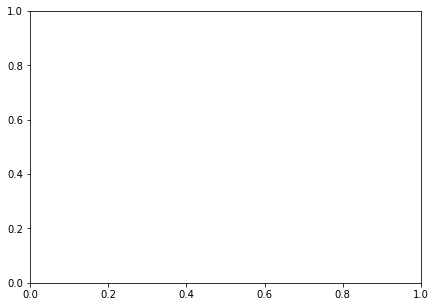

In [34]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

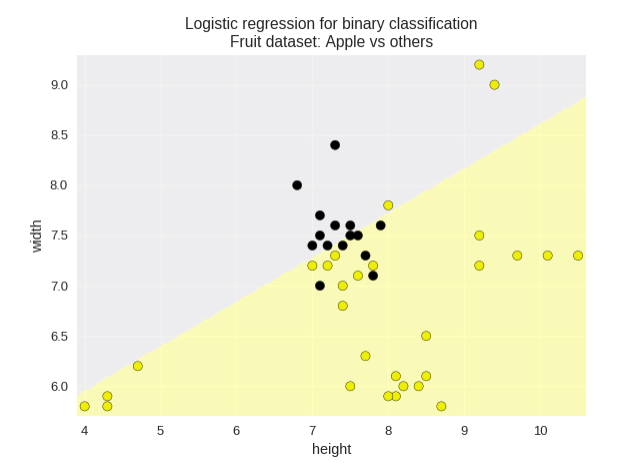

#### Logistic regression on simple synthetic dataset

Accuracy of Logistic regression classifier on training set: 0.81
Accuracy of Logistic regression classifier on test set: 0.84


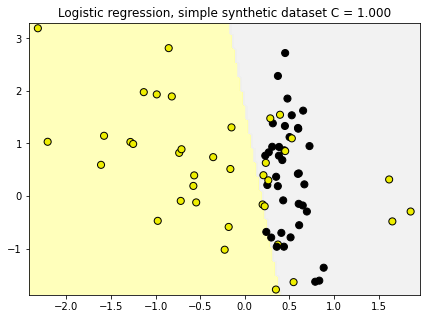

In [38]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

# we use 100 samples, 2 features (both informative, not redundant)
#each class has only one cluster
#flip_y is the fraction of samples whose cateory is assigned randomly 
#(not according to some rule, just random, in order to confuse)

# class_sep: larger values make the clusters spread out and therefore the 
# problem easier
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)


# Test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

# we make a logistic regression fit the data
fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)

# we plot the regions
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

# calculate the accuracy

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Logistic regression regularization: C parameter


In [39]:
# we can change a parameter called C parameter

X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

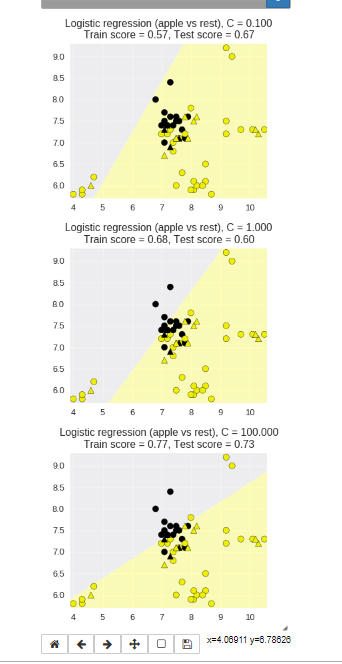

##### Application to Real Data Set

In [40]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.96


c:\users\tbasi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Support Vector Machines

#### Linear Support Vector Machine

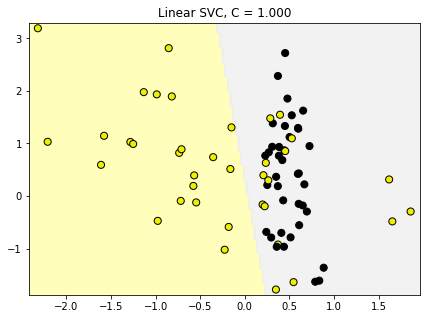

In [41]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


# take the data
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

#### Linear Support Vector Machine: C parameter

c:\users\tbasi\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


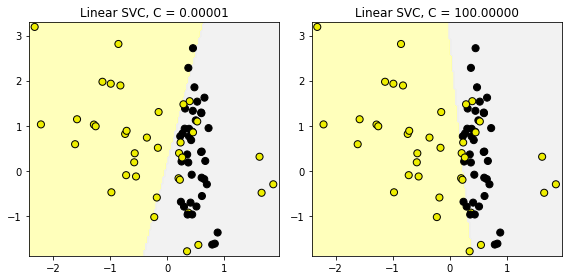

In [42]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

#### Application to real dataset

In [43]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

# Make the linear support vector machine
clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.93
Accuracy of Linear SVC classifier on test set: 0.95


c:\users\tbasi\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Multi-class classification with linear models

#### LinearSVC with M classes generates M one vs rest classifiers.

In [45]:
from sklearn.svm import LinearSVC
# take the data

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

# calculate the linear SVC with C=5
clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)

# Get the coefficients 
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.3   0.72]
 [-1.63  1.16]
 [ 0.01  0.43]
 [ 1.25 -1.64]]
Intercepts:
 [-3.29  1.2  -3.04  1.16]


c:\users\tbasi\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Multi-class results on the fruit dataset

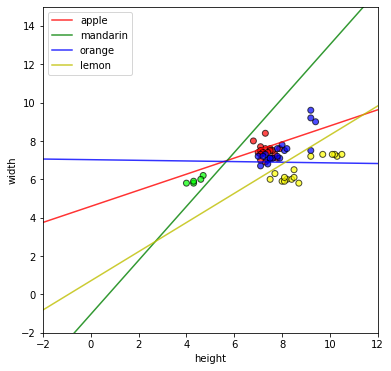

In [46]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

# scatter the fruits with color

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

# take the coefficients

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

## Kernelized Support Vector Machines

##### Classification

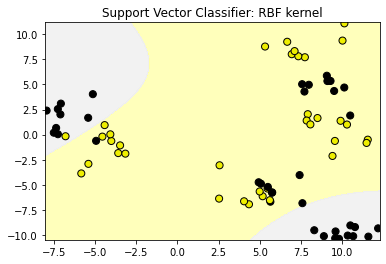

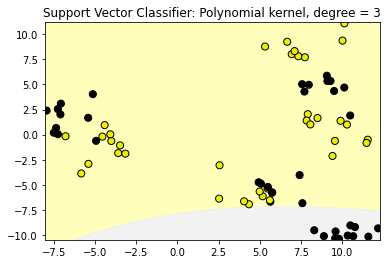

In [47]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

# take the data
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
# make the SVC fitness
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
# 
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

##### Support Vector Machine with RBF kernel: Gamma Parameter

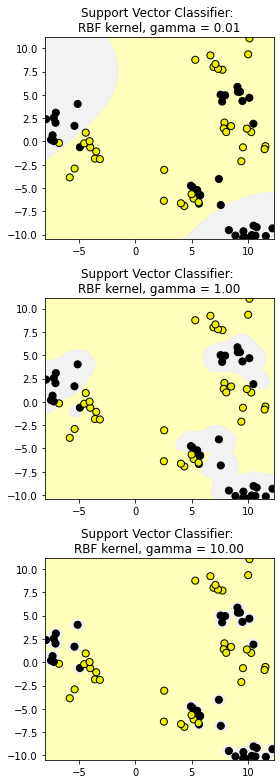

In [48]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

#### Support Vector Machine with RBF kernel: using both C and gamma parameter 

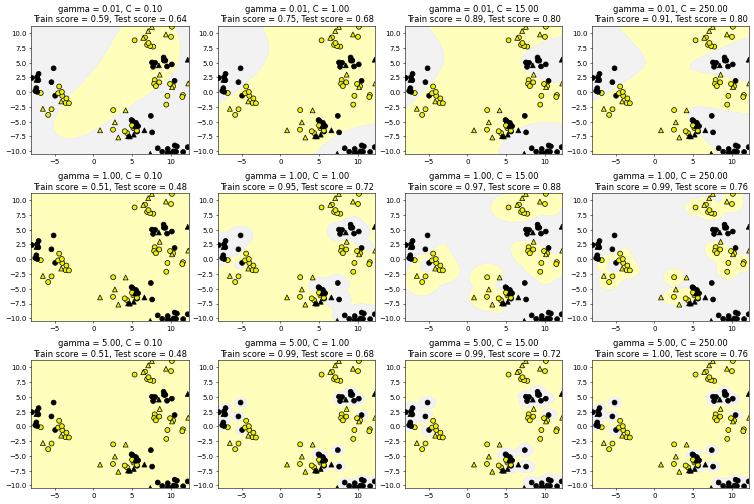

In [49]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Application of SVMs to a real dataset: unnormalized data

In [50]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 0.92
Accuracy of RBF-kernel SVC on test set: 0.94


## Cross-Validation

##### Example based on k-NN classifier with fruit dataset (2 features)

In [51]:
from sklearn.model_selection import cross_val_score

# take the KNN classifier with 5 neighbots
clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

## Validation curve example

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

NameError: name 'X' is not defined

# Decision Treees

In [54]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split


iris = load_iris()
# separate the data set

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)

# create a decision Tree classifier object with train object
clf = DecisionTreeClassifier().fit(X_train, y_train)

# print the train data and test data scores

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.95


#### Setting max decision tree depth to help avoid overfitting

In [56]:
# set max depth
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


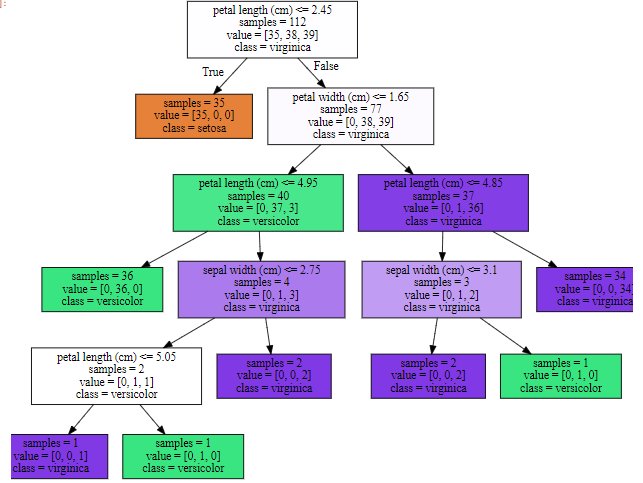

#### Feature Importance

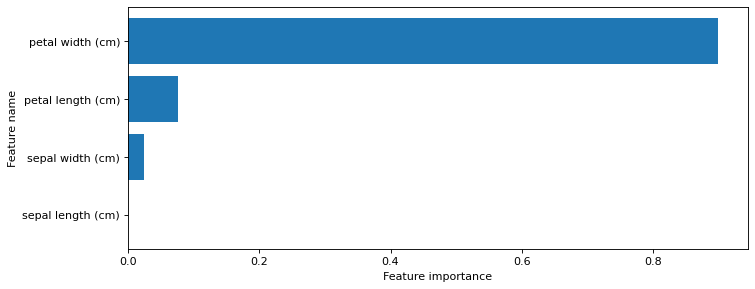

Feature importances: [0.   0.02 0.08 0.9 ]


In [58]:
from adspy_shared_utilities import plot_feature_importances

# the importance of each feature depending on the entropy change

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

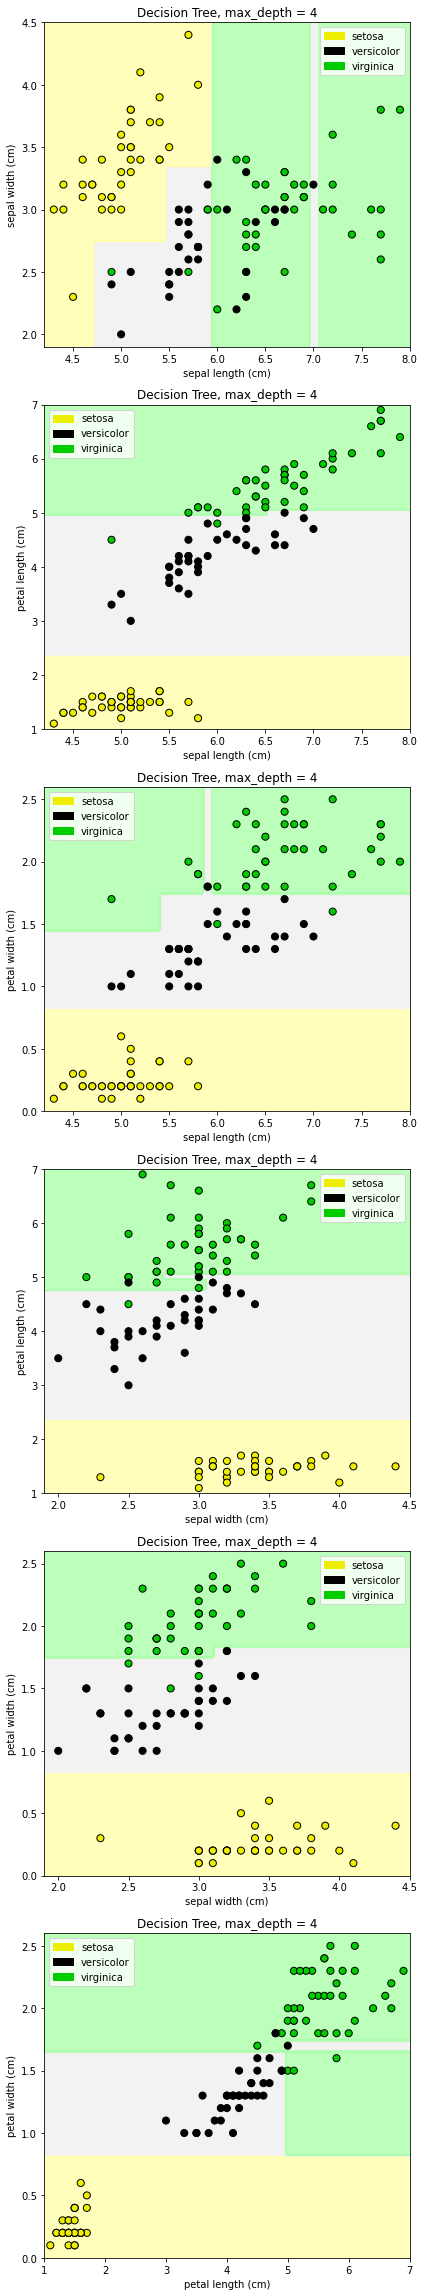

In [59]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

##### Decision Trees on a real world data set

In [61]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

# make a train test data split in cance patients
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

# create a decision tree of depth 4 and fit to the data
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

plot_decision_tree(clf, cancer.feature_names, cancer.target_names);

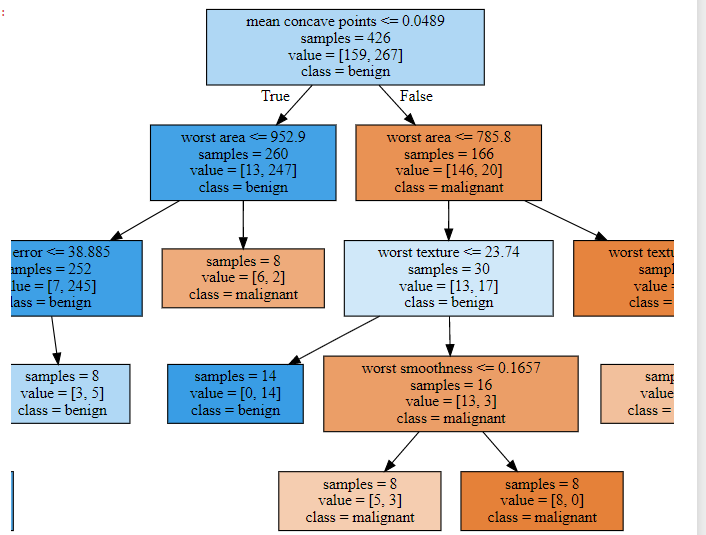

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94


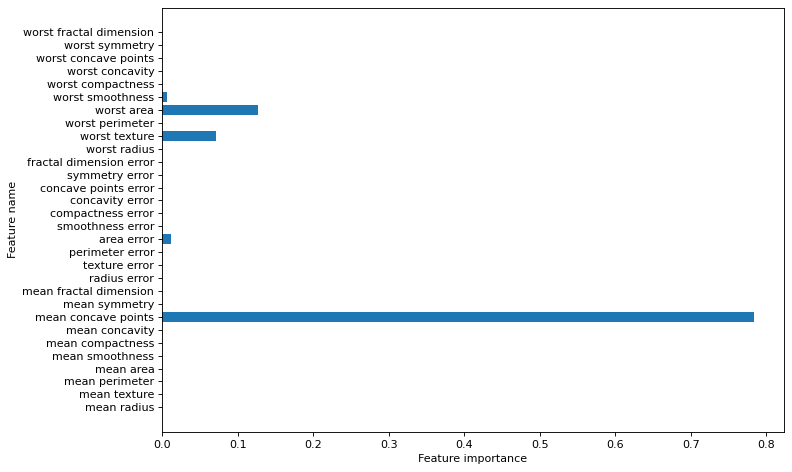

In [63]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

# see the importance of each feature in the tree
plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()